### Bagging (Bootstrap Aggregating)
Bagging là một kỹ thuật học máy giúp cải thiện độ chính xác và độ ổn định của các mô hình học máy bằng cách kết hợp nhiều mô hình (cùng loại). Kỹ thuật này hữu ích trong việc giảm thiểu hiện tượng overfitting và giảm phương sai của mô hình.

#### Cách thức hoạt động của Bagging:
1. **Tạo các bộ dữ liệu con**: Tạo ra các bộ dữ liệu con có dữ liệu bằng dữ liệu gốc, dữ liệu có thể trùng lặp. Quá trình này được gọi là **bootstrap sampling**.

2. **Huấn luyện các mô hình**: Với mỗi bộ dữ liệu con, chúng ta huấn luyện một mô hình giống nhau.

3. **Kết hợp các mô hình**: Đối với bài toán phân loại, kết quả đầu ra của các mô hình được kết hợp thông qua phương pháp majority voting (lấy kết quả được dự đoán nhiều nhất từ các mô hình con). Đối với bài toán hồi quy, kết quả được tính bằng cách trung bình đầu ra của các mô hình.

### Random Forest
Random Forest là một biến thể của Bagging áp dụng cụ thể cho các cây quyết định. Nó cải thiện thêm một bước so với Bagging bằng cách giới thiệu thêm một yếu tố ngẫu nhiên khi xây dựng các cây quyết định.

#### Cách thức hoạt động của Random Forest:
1. **Tạo các bộ dữ liệu con**: Random Forest sử dụng bootstrap sampling để tạo ra các bộ dữ liệu con từ bộ dữ liệu gốc.

2. **Tạo cây quyết định ngẫu nhiên**:
   - Tại mỗi nút phân tách trong cây, thay vì xem xét toàn bộ các đặc trưng (features), Random Forest chỉ chọn ngẫu nhiên một tập con các đặc trưng để tìm ra đặc trưng tốt nhất để phân tách. Điều này làm giảm sự tương quan giữa các cây và cải thiện độ chính xác của mô hình.
   - Các cây quyết định được xây dựng với độ sâu tối đa có thể (hoặc theo một tiêu chí dừng nhất định).

3. **Kết hợp các cây quyết định**: Kết quả cuối cùng được tính bằng cách kết hợp các kết quả của từng cây trong rừng:
   - Với bài toán phân loại: Sử dụng majority voting.
   - Với bài toán hồi quy: Tính trung bình các dự đoán của các cây.

### Ưu điểm của Random Forest:
- **Giảm phương sai**: Nhờ việc kết hợp nhiều cây quyết định, Random Forest có khả năng giảm thiểu phương sai của mô hình.
- **Chống overfitting**: Do các cây quyết định trong Random Forest được xây dựng từ các tập con khác nhau của dữ liệu và chỉ sử dụng một phần đặc trưng tại mỗi nút, mô hình ít bị overfitting hơn so với việc sử dụng một cây quyết định duy nhất.
- **Hiệu quả với dữ liệu lớn**: Random Forest có thể xử lý dữ liệu với số lượng đặc trưng và mẫu lớn.

### Hạn chế:
- **Khó giải thích**: Do mô hình Random Forest bao gồm nhiều cây quyết định, nó khó giải thích hơn một cây quyết định đơn lẻ.
- **Thời gian**: Việc huấn luyện và dự đoán với Random Forest thường tốn nhiều thời gian hơn so với các mô hình đơn giản hơn, đặc biệt với số lượng cây lớn.



In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
class RandomForestClassification:
    def __init__(self, max_depth = 10, min_node_size = 1, max_leaf_node=15, min_gain=1e-4, min_samples_split=3, num_iter = 100):
        self.max_depth = max_depth
        self.min_node_size = min_node_size
        self.max_leaf_node = max_leaf_node
        self.min_gain = min_gain
        self.min_samples_split = min_samples_split
        self.trees = []
        self.num_iter = num_iter
    
    def _sample(self, X, y):
        n_rows, _ = X.shape
        samples = np.random.choice(a=n_rows, size=n_rows, replace=True)
        return X.iloc[samples], y[samples]

    def fit(self, X, y):
        if isinstance(X, pd.DataFrame): X = X.reset_index(drop=True)
        if isinstance(y, pd.Series): y = y.values
        for i in range(self.num_iter):
            X_resampled, y_resampled = self._sample(X, y)
            
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split= self.min_samples_split,
            )
            tree.fit(X_resampled, y_resampled)
            self.trees.append(tree)
    
    def predict(self, X_test):
        tree_predictions = np.array([tree.predict(X_test) for tree in self.trees])
        return np.array([Counter(predictions).most_common(1)[0][0] for predictions in tree_predictions.T])

        
        

In [3]:
data = pd.read_csv('car_evaluation.csv')
data.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


(array([1209.,    0.,    0.,  384.,    0.,    0.,   65.,    0.,    0.,
          69.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

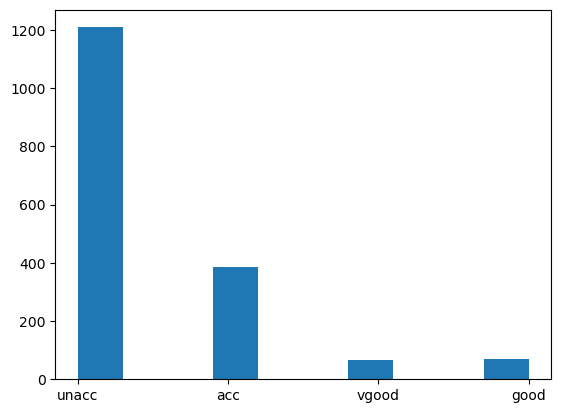

In [4]:
plt.hist(data.iloc[:,-1])

In [5]:
pd.get_dummies(data.iloc[:,-1])

,acc,good,unacc,vgood
0,False,False,True,False
1,False,False,True,False
2,False,False,True,False
3,False,False,True,False
4,False,False,True,False
...,...,...,...,...
1722,False,True,False,False
1723,False,False,False,True
1724,False,False,True,False
1725,False,True,False,False


In [6]:
from sklearn.model_selection import  train_test_split
from sklearn.metrics import accuracy_score
X = pd.get_dummies(data.iloc[:,:-1])

y = data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
rf_build = RandomForestClassification()
rf_build.fit(X_train, y_train)
pred = rf_build.predict(X_test)
print(f'accuracy test: {accuracy_score(pred, y_test)}')
pred_train = rf_build.predict(X_train)
print(f'accuracy train: {accuracy_score(pred_train, y_train)}')

accuracy test: 0.9730250481695568
accuracy train: 0.9966887417218543


### Sử dụng thư viện

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf_sklearn = RandomForestClassifier()
rf_sklearn.fit(X_train, y_train)
pred = rf_sklearn.predict(X_test)
print(f'accuracy test: {accuracy_score(pred, y_test)}')
pred_train = rf_sklearn.predict(X_train)
print(f'accuracy train: {accuracy_score(pred_train, y_train)}')

accuracy test: 0.9595375722543352
accuracy train: 1.0


In [39]:
for x in X_test[:]:
    print(x)

acc
good
unacc
vgood


In [48]:
for x in X.:
    print(x)

vhigh_high
vhigh_low
vhigh_med
vhigh_vhigh
vhigh.1_high
vhigh.1_low
vhigh.1_med
vhigh.1_vhigh
2_2
2_3
2_4
2_5more
2.1_2
2.1_4
2.1_more
small_big
small_med
small_small
low_high
low_low
low_med


In [ ]:
X.loc